# Pandas API

This notebook scopes out the capacities of the `pandas` API. Here and there I insert comparable `seaborn` plots (`seaborn` is better for composition but `pandas` is often fine for smaller plots).

In [2]:
import pandas as pd
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import seaborn as sns

In [4]:
%ls

big-box-plot.png                 seaborn_api_box_violin.ipynb
big-violin-plot.png              seaborn_api_categorical.ipynb
nyc_building_sales.csv           seaborn_api_model_fitting.ipynb
pandas_api.ipynb                 seaborn_api_multivariate.ipynb


In [5]:
sales = pd.read_csv("nyc_building_sales.csv")

/Users/Honors/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (23,26,28,29,70,71,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pd.set_option("max_columns", 500)

In [7]:
sales.head(1)

,Unnamed: 0,Index,Borough,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt,ValueRatio
0,0,0,Bronx,2268.0,18.0,1800000.0,2500.0,221.538462,201.0,41.0,1002.0,7.0,8.0,10454.0,E083,40.0,4500.0,2.0,1.0,2A,532 EAST 142 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R6,NaN,N,C1,2.0,0.0,P,"HAXHARI, GAC",2500.0,8125.0,0.0,8125.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,7.0,7.0,25.0,100.0,0.0,0.0,NaN,2.0,N,5.0,2.0,2197.0,216878.0,0.0,0.0,2015.0,NaN,0.0,0.0,NaN,NaN,3.25,2.43,0.0,4.8,2.0,2.022680e+09,0.0,41.0,1007305.0,234328.0,6a,NaN,209S029,20901.0,NaN,0.0,NaN,1.0,16v1,143700.0,620769.0,2035.0,0.250462,17.686154,76.402338,2.899629


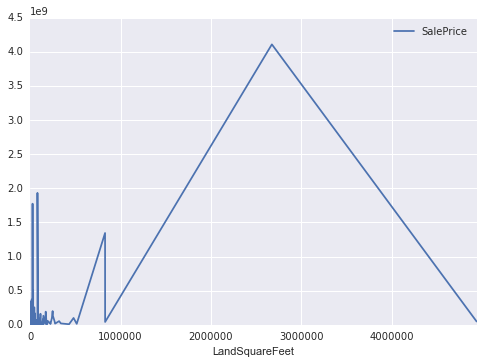

In [26]:
sales[['LandSquareFeet', 'SalePrice']].sort_values(by='LandSquareFeet').plot(x='LandSquareFeet', y='SalePrice')

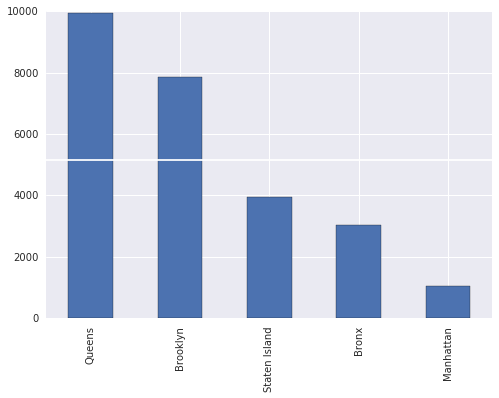

In [40]:
sales['Borough'].value_counts().plot.bar()
plt.axhline(np.mean(sales['Borough'].value_counts().values), color='w')

In [36]:
num_index = sales.groupby('Borough').count()['Index'].sort_values(ascending=False).index

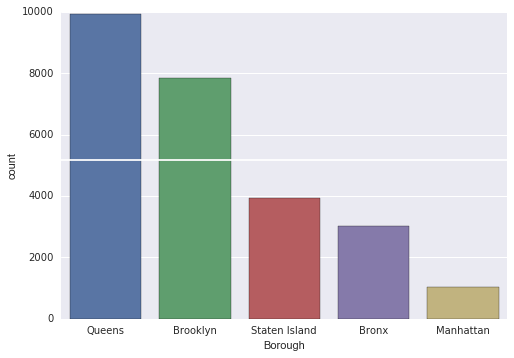

In [39]:
sns.countplot(x='Borough', data=sales, order=num_index)
plt.axhline(np.mean(sales['Borough'].value_counts().values), color='w')

`seaborn` doesn't sort the bars any particular way by default, you have to specify that manually using `order`, which requires computing that information&mdash;rather burdensome.